https://www.kaggle.com/amirrezaeian/time-series-data-analysis-using-lstm-tutorial


In [166]:
import sys 
import numpy as np # linear algebra
from numpy.random import randn
from numpy.random import randint
from numpy import expand_dims
from numpy import zeros
from numpy import ones

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout, Flatten, Reshape

In [13]:
df = pd.read_csv('TimeForecasting/data/household_power_consumption.txt', sep=';',
                parse_dates={'dt':['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [14]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 126.7 MB


In [16]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [17]:
df.columns[df.isna().any()].tolist()

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [19]:
df.fillna(0, axis=1, inplace=True)

In [20]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

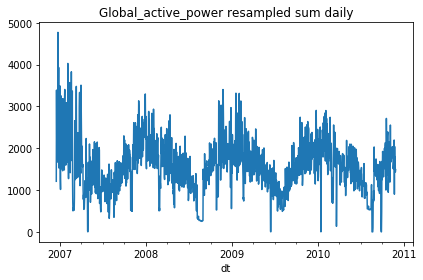

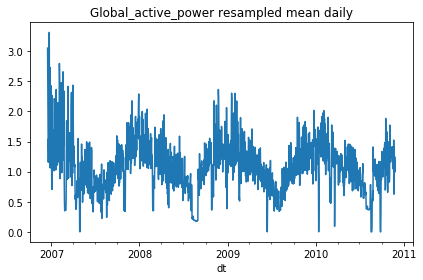

In [23]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled sum daily')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled mean daily')
plt.tight_layout()
plt.show()

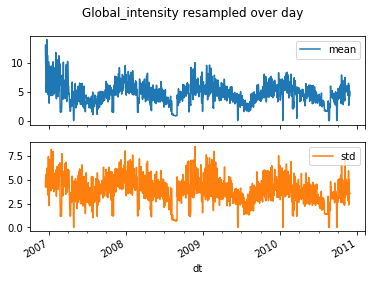

In [24]:
### mean and std of 'Global_intensity' resampled over day 
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

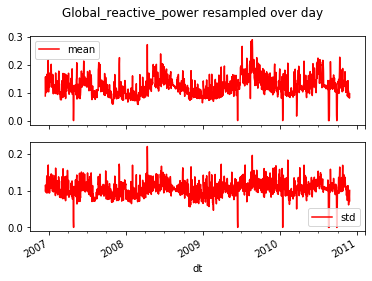

In [25]:
#mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

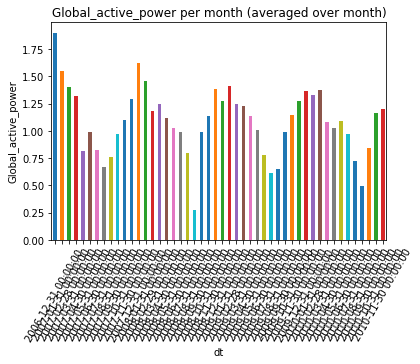

In [26]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

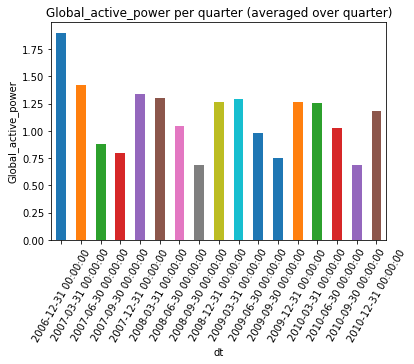

In [27]:
## Mean of 'Global_active_power' resampled over quarter
df['Global_active_power'].resample('Q').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per quarter (averaged over quarter)')
plt.show()

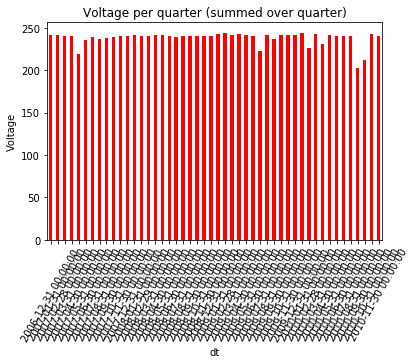

In [28]:
## mean of 'Voltage' resampled over month
df['Voltage'].resample('M').mean().plot(kind='bar', color='red')
plt.xticks(rotation=60)
plt.ylabel('Voltage')
plt.title('Voltage per quarter (summed over quarter)')
plt.show()

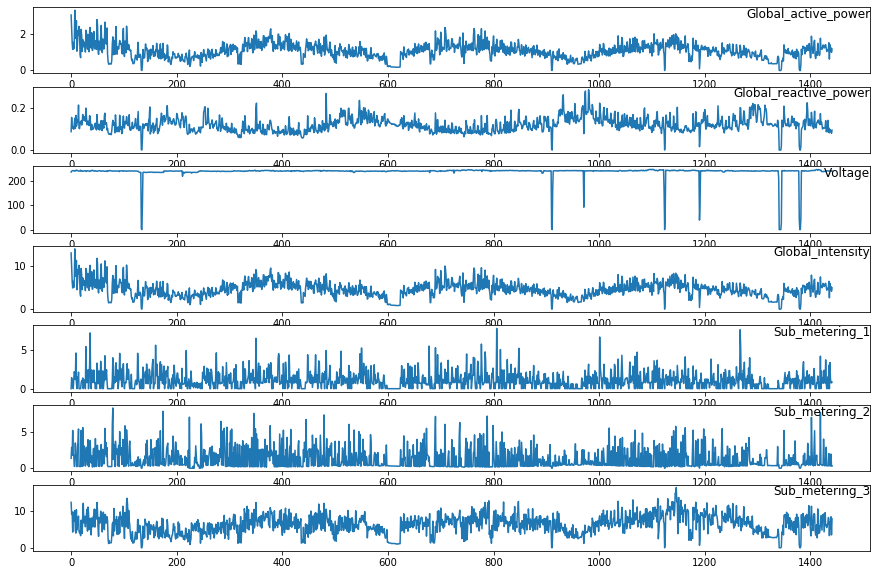

In [29]:
values = df.resample('D').mean().values
plt.figure(figsize=(15,10))
cols = np.arange(0,7)

for i, group in enumerate(cols):
    plt.subplot(len(cols), 1, i+1)
    plt.plot(values[:, group])
    plt.title(df.columns[group], y=0.75, loc='right')

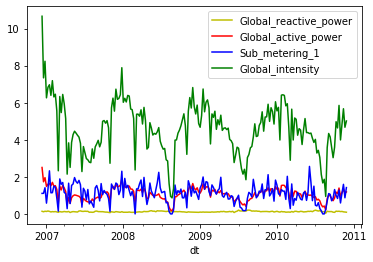

In [30]:
## resampling over week and computing mean
df.Global_reactive_power.resample('W').mean().plot(color='y', legend=True)
df.Global_active_power.resample('W').mean().plot(color='r', legend=True)
df.Sub_metering_1.resample('W').mean().plot(color='b', legend=True)
df.Global_intensity.resample('W').mean().plot(color='g', legend=True)
plt.show()

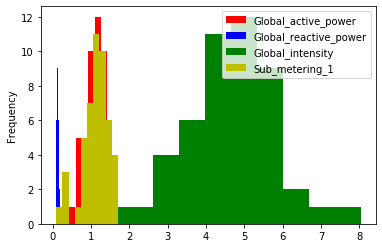

In [31]:
# Below I show hist plot of the mean of different feature resampled over month 
df.Global_active_power.resample('M').mean().plot(kind='hist', color='r', legend=True )
df.Global_reactive_power.resample('M').mean().plot(kind='hist',color='b', legend=True)
#df.Voltage.resample('M').sum().plot(kind='hist',color='g', legend=True)
df.Global_intensity.resample('M').mean().plot(kind='hist', color='g', legend=True)
df.Sub_metering_1.resample('M').mean().plot(kind='hist', color='y', legend=True)
plt.show()

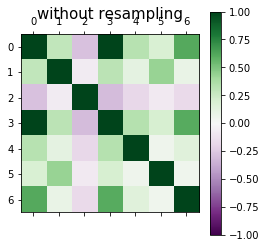

In [40]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

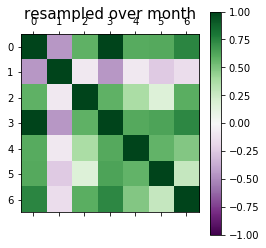

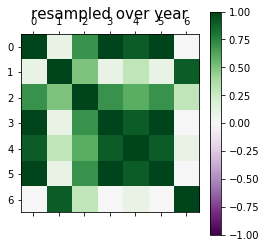

In [41]:
# Correlations of mean of features resampled over months
plt.matshow(df.resample('M').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over month', size=15)
plt.colorbar()
plt.margins(0.02)
plt.matshow(df.resample('A').mean().corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('resampled over year', size=15)
plt.colorbar()
plt.show()

In [44]:
# convert time series to supervised

def series_to_supervised(data,n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
   
    # forecast sequence(t, t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis =1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [42]:
## resampling of data over hour
df_resample = df.resample('h').mean() 
df_resample.shape

(34589, 7)

In [239]:
# feature engineering
## If you would like to train based on the resampled data (over hour), then used below
#values = df_resample.values 


## full data without resampling
values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print(scaled.shape, 'scaled_shape')
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

(2075259, 7) scaled_shape
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.379069   0.300719   0.924021   0.380165        0.0     0.0125   
2   0.481928   0.313669   0.919260   0.475207        0.0     0.0125   
3   0.483186   0.358273   0.917922   0.475207        0.0     0.0250   
4   0.484445   0.361151   0.919693   0.475207        0.0     0.0125   
5   0.329617   0.379856   0.927326   0.326446        0.0     0.0125   

   var7(t-1)   var1(t)  
1   0.548387  0.481928  
2   0.516129  0.483186  
3   0.548387  0.484445  
4   0.548387  0.329617  
5   0.548387  0.316490  


In [240]:
print(reframed.shape)

(2075258, 8)


In [226]:
test = scaler.fit(values)


(2075258, 8)

In [51]:
# save scaled full data into csv 
import csv 
with open('scaled_data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(scaled)

In [223]:
# splitting data into train and test
values = reframed.values

n_train_time = 365*24
train = values[:n_train_time, :]
test = values[n_train_time:, :]

# split into input and output
train_X, train_y = train[:,:-1],train[:,-1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape into required format [samples, timestamp, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 


(8760, 1, 7) (8760,) (2066498, 1, 7) (2066498,)


In [224]:
#model 

model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss = 'mse', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 2066498 samples
Epoch 1/20
 - 18s - loss: 0.0123 - val_loss: 0.0023
Epoch 2/20
 - 17s - loss: 0.0036 - val_loss: 0.0012
Epoch 3/20
 - 18s - loss: 0.0026 - val_loss: 9.6477e-04
Epoch 4/20
 - 18s - loss: 0.0021 - val_loss: 8.1717e-04
Epoch 5/20
 - 18s - loss: 0.0019 - val_loss: 7.2229e-04
Epoch 6/20
 - 19s - loss: 0.0017 - val_loss: 6.7036e-04
Epoch 7/20
 - 19s - loss: 0.0016 - val_loss: 6.3281e-04
Epoch 8/20
 - 19s - loss: 0.0016 - val_loss: 6.1643e-04
Epoch 9/20
 - 18s - loss: 0.0015 - val_loss: 6.0972e-04
Epoch 10/20
 - 18s - loss: 0.0015 - val_loss: 6.0776e-04
Epoch 11/20
 - 18s - loss: 0.0015 - val_loss: 6.1208e-04
Epoch 12/20
 - 19s - loss: 0.0015 - val_loss: 6.1006e-04
Epoch 13/20
 - 19s - loss: 0.0015 - val_loss: 6.1726e-04
Epoch 14/20
 - 19s - loss: 0.0015 - val_loss: 6.0938e-04
Epoch 15/20
 - 20s - loss: 0.0015 - val_loss: 6.2509e-04
Epoch 16/20
 - 19s - loss: 0.0015 - val_loss: 6.1394e-04
Epoch 17/20
 - 18s - loss: 0.0015 - val_loss: 6.1993e-

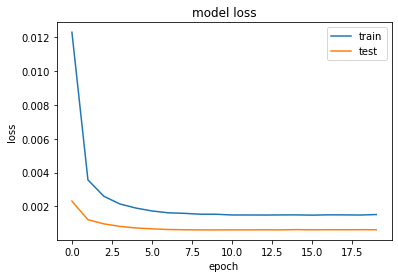

In [229]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [230]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 7))
print(test_X.shape, 'test_x shape')
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -6:]), axis=1)
print(inv_yhat.shape, 'inv_yhat shape')
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape, 'inv_yhat shape after transform')

inv_yhat = inv_yhat[:,0]
print(inv_yhat.shape, 'inv_yhat shape after 0')

# invert scaling for actual
print('test y shape', test_y.shape)
test_y = test_y.reshape((len(test_y), 1))
print('test y shape after reshape 1', test_y.shape)

inv_y = np.concatenate((test_y, test_X[:, -6:]), axis=1)
print('inv_y shape concat', inv_y.shape)

inv_y = scaler.inverse_transform(inv_y)
print('inv_y shape inverse transform', inv_y.shape)

inv_y = inv_y[:,0]
print('inv_y shape 0', inv_y.shape)

# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

(2066498, 7) test_x shape
(2066498, 7) inv_yhat shape
(2066498, 7) inv_yhat shape after transform
(2066498,) inv_yhat shape after 0
test y shape (2066498,)
test y shape after reshape 1 (2066498, 1)
inv_y shape concat (2066498, 7)
inv_y shape inverse transform (2066498, 7)
inv_y shape 0 (2066498,)
Test RMSE: 0.276


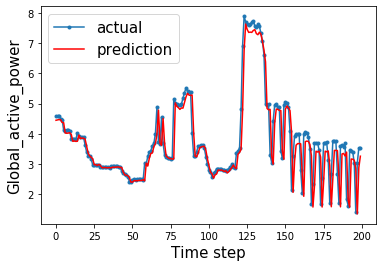

In [56]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(200)]
plt.plot(aa, inv_y[:200], marker='.', label="actual")
plt.plot(aa, inv_yhat[:200], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [57]:
train_X.shape

(8760, 1, 7)

## GAN test
for this part only using one value for the previous value for global active power and the next global power

In [167]:
# define discriminator 
def disciminator(in_shape):
    model = Sequential()
    model.add(LSTM(500, input_shape=in_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(0.0002, 0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# define generator 
def generator(latent_dim, n_outputs):
    model = Sequential()
    model.add(LSTM(500, input_shape=(latent_dim, 1)))
    model.add(Dropout(0.2))
    #model.add(Flatten())
    model.add(Dense(np.prod(n_outputs), activation='linear'))
    model.add(Reshape(n_outputs))
    return model

# define the commbined model for genreator and discriminator model
def define_gan(generator, disciminator):
    disciminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(disciminator)
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
    return model

In [281]:
from numpy.random import rand

# generate points in latent_space for generator
def generate_latent_points(latent_dim, n):   
    x_input = randn(latent_dim * n)
    x_input = x_input.reshape(n, latent_dim, 1)
    return x_input

# use generator to produce n fake examples
def generate_fake_samples(generator, latent_dim, n):
    x_input = generate_latent_points(latent_dim, n)
    X = generator.predict(x_input)
    y = zeros((n, 1))
    return X, y

# select real samples 
def generate_real_samples(data, n_samples):
    #choose random samples
    ix = randint(0, data.shape[0], n_samples)
    #select data points
    X = data[ix]
    # label for real data
    y = ones((n_samples, 1))
    return X, y

def fix_data_dimension(x):
    inv_x = x.reshape(x.shape[0], -1 )
    # i need to shift by one because of the lag introduced before
    # remove the first value since it is redundent 
    inv_x = inv_x[:,1:]
    inv_x = scaler.inverse_transform(inv_x)
    # the last column is of interest here 
    return inv_x[:,-1]

def summarize_performance(data , epoch, generator, discriminator, latent_dim, n=100):
    x_real, y_real = generate_real_samples(data ,n)
    #evaluate discriminator on real samples
    _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
    
    # fake date performance
    x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
    #evaluate discriminator on real samples
    _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
    
    # summarize discriminator performance
    print(epoch, acc_real, acc_fake)
    aa=[x for x in range(epoch)]
    inv_real = fix_data_dimension(x_real)
    inv_fake = fix_data_dimension(x_fake)
    plt.plot(aa, inv_real[:n], marker='.', label="actual")
    plt.savefig('actual_image %d.png' %epoch)
    plt.plot(aa, inv_fake[:epoch], marker='.', label="fake")
    plt.show()
    plt.savefig('gan_generated_image %d.png' %epoch)
    
    # save model 
    generator.save('generator_model{}.h5'.format(epoch))
    discriminator.save('discriminator_model{}.h5'.format(epoch))

In [280]:
def train(data, g_model, d_model, gan_model, latent_dim, n_epochs=1000, n_batch=100, n_eval=100):
    half_batch = int(n_batch*0.5)
    
    for i in range(n_epochs):
        x_real, y_real = generate_real_samples(data ,half_batch)
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        
        # update gan 
        # generate points 
        x_gan = generate_latent_points(latent_dim, n_batch)
        y_gan = ones((n_batch, 1))
        
        gan_model.train_on_batch(x_gan, y_gan)
        if (i+1) % n_eval == 0:
            summarize_performance(data, i, g_model, d_model, latent_dim)

In [279]:
latent_dim = 5

#train_data = reframed[['var1(t-1)','var1(t)']].values
train_data = reframed.values
# this reshape is required for the input of LSTM
train_data = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
input_shape=(train_data.shape[1], train_data.shape[2])

d_model = disciminator(input_shape)
d_model.summary()

g_model = generator(latent_dim ,input_shape)
g_model.summary()

gan_model = define_gan(g_model, d_model)
train(train_data, g_model, d_model, gan_model, latent_dim)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 500)               1018000   
_________________________________________________________________
dropout_37 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 501       
Total params: 1,018,501
Trainable params: 1,018,501
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_52 (LSTM)               (None, 500)               1004000   
_________________________________________________________________
dropout_38 (Dropout)         (None, 500)               0         
_________________________________________________________________


TypeError: generate_real_samples() missing 1 required positional argument: 'n_samples'

In [ ]:
# evaulate the performance code 

In [231]:
#train_data = reframed[['var1(t-1)','var1(t)']].values
train_data = reframed.values
# this reshape is required for the input of LSTM
train_data = train_data.reshape((train_data.shape[0], 1, train_data.shape[1]))
input_shape=(train_data.shape[1], train_data.shape[2])

In [233]:
reframed.values.shape

(2075258, 8)

In [199]:
generate_real_samples(train_data, 1)

(array([[[0.01402625, 0.        , 0.94928192, 0.01239669, 0.        ,
          0.        , 0.03225806, 0.06239885]]]), array([[1.]]))

In [200]:
input_shape

(1, 8)

In [201]:
d_model = disciminator(input_shape)
d_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_40 (LSTM)               (None, 500)               1018000   
_________________________________________________________________
dropout_26 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 501       
Total params: 1,018,501
Trainable params: 1,018,501
Non-trainable params: 0
_________________________________________________________________


In [202]:
g_model = generator(5 ,input_shape)
g_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 500)               1004000   
_________________________________________________________________
dropout_27 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 4008      
_________________________________________________________________
reshape_4 (Reshape)          (None, 1, 8)              0         
Total params: 1,008,008
Trainable params: 1,008,008
Non-trainable params: 0
_________________________________________________________________


In [203]:
gan = define_gan(g_model, d_model)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_58 (Sequential)   (None, 1, 8)              1008008   
_________________________________________________________________
sequential_57 (Sequential)   (None, 1)                 1018501   
Total params: 2,026,509
Trainable params: 1,008,008
Non-trainable params: 1,018,501
_________________________________________________________________


In [204]:
generate_fake_samples(g_model, 5, 1)

(array([[[-0.01192736, -0.01624802,  0.02553802, -0.04317429,
           0.0003348 , -0.0217345 ,  0.03376874, -0.03614623]]],
       dtype=float32), array([[0.]]))